# **Inheritance**
The language feature most often associated with object-oriented programming is
inheritance. 

Inheritance is the ability to define a new class that is a modified version of an existing class.

# **Card Objects**
There are 52 cards in a deck, each of which belongs to 1 of 4 suits and 1 of 13
ranks. 

The suits are Spades, Hearts, Diamonds, and Clubs (in descending order
in bridge). 

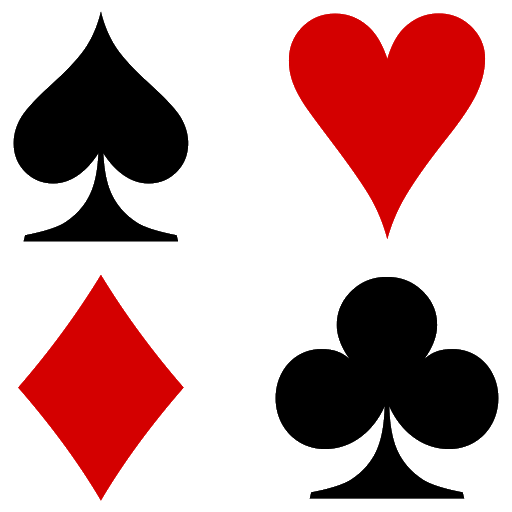

The ranks are Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
Depending on the game that you are playing, an **Ace "A" may be higher than King or lower than 2**.

If it is required to define a new object to represent a playing card, it is obvious what the attributes should be: rank and suit. 

It is not as obvious what type the attributes should be. 

One possibility is to use strings containing words like 'Spade' for suits and 'Queen' for ranks. 

One problem with this implementation is that it would not be easy to compare cards to see which had a higher rank or suit.

An alternative is to use integers to encode the ranks and suits. 

In this context, “encode” means that we are going to define a mapping between numbers and suits, or between numbers and ranks. 

This kind of encoding is not meant to be a secret (that would be “encryption”).

# **For Example:** 

This table shows the suits and the corresponding integer codes:

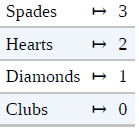

This code makes it easy to compare cards; because higher suits map to higher
numbers, the suits can compared  by comparing their codes.

The mapping for ranks is fairly obvious; each of the numerical ranks maps to the
corresponding integer, and for face cards:

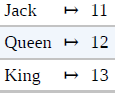

the ↦ symbol is being used to make it clear that these mappings are not part of the Python program. 

They are part of the program design, but they don’t appear explicitly in the code.



The class definition for Card looks like this:

In [ ]:
class Card:
  """Represents a standard playing card."""
  def __init__(self, suit=0, rank=2):
    self.suit = suit
    self.rank = rank

As usual, the init method takes an optional parameter for each attribute. 

The default card is the 2 of Clubs.

To create a Card, Card with the suit is called  and rank of the card that is required: queen_of_diamonds = Card(1, 12)

# **Class Attributes**
In order to print Card objects in a way that people can easily read, a
mapping is needed from the integer codes to the corresponding ranks and suits. 

A natural way to do that is with lists of strings. 

These lists are assigned to class attributes:

# inside class Card:

suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']

rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10','Jack', 'Queen', 'King']

def __str__(self):

  return '%s of %s' % (Card.rank_names[self.rank], Card.suit_names[self.suit])

Variables like suit_names and rank_names, which are defined inside a class but
outside of any method, are called class attributes because they are associated
with the class object Card.

This term distinguishes them from variables like suit and rank, which are called
instance attributes because they are associated with a particular instance.

Both kinds of attribute are accessed using dot notation. 

**For Example:** 

in __str__, self is a Card object, and self.rank is its rank. 

Similarly, Card is a class object, and **Card.rank_names** is a list of strings associated with the class.

Every card has its own suit and rank, but there is only one copy of **suit_names** and **rank_names**.

Putting it all together, the expression **Card.rank_names[self.rank]** means “use the attribute rank from the object self as an index into the list **rank_names** from the class Card, and select the appropriate string.”

The first element of **rank_names** is None because there is no card with rank zero.

By including None as a place-keeper, a mapping with the nice property can be got with the index 2 which maps to the string '2', and so on. 

To avoid this tweak, a dictionary could have been used instead of a list.

With the methods, cards can be created and printed :

# >>> card1 = Card(2, 11)

# >>> print(card1)

The output looks like:

# Jack of Hearts

Figure 18-1 is a diagram of the Card class object and one Card instance. 

Card is a class object; its type is type. card1 is an instance of Card, so its type is Card.

To save space, I didn’t draw the contents of suit_names and rank_names.

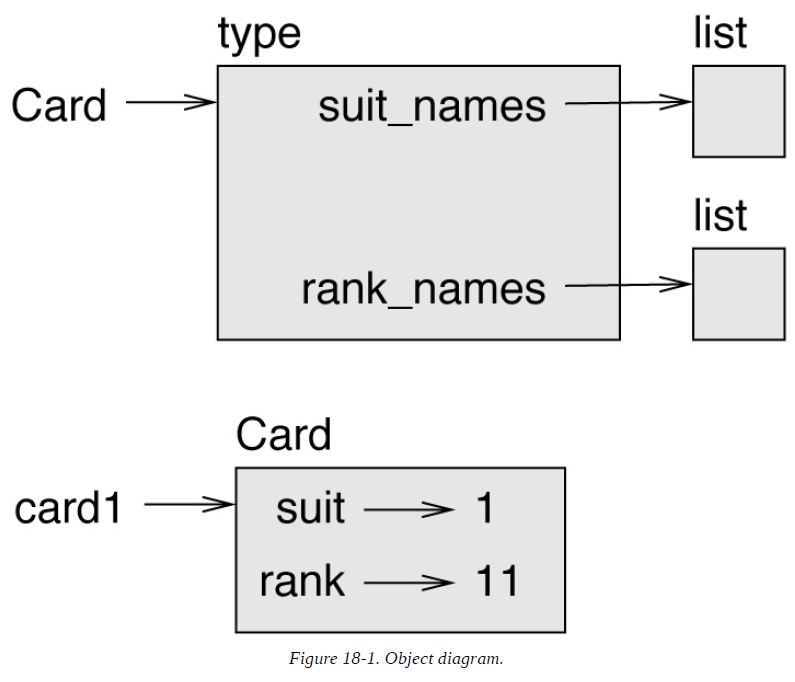




# **Comparing Cards**
For built-in types, there are relational operators (<, >, ==, etc.) that compare
values and determine when one is greater than, less than, or equal to another. 

For programmer-defined types, the behavior of the built-in operators can be overriden by providing a method named __lt__, which stands for “less than”.

__lt__ takes two parameters, self and other, and True if self is strictly less
than other.

The correct ordering for cards is not obvious. 

**For Example:**

Which is better, the 3 of Clubs or the 2 of Diamonds? One has a higher rank, but the other has a higher suit. 

In order to compare cards, it has to be decided whether rank or suit is more
important.

The answer might depend on what game is being played, but to keep things simple,  the arbitrary choice that suit is more important is made, so all of the Spades outrank all of the Diamonds, and so on.

With that decided, it can be written as __lt__:

In [ ]:
# inside class Card:
def __lt__(self, other):
  # check the suits
  if self.suit < other.suit: return True
  if self.suit > other.suit: return False
  # suits are the same... check ranks
  return self.rank < other.rank

This  can be written  more concisely using tuple comparison:

# inside class Card:
  def __lt__(self, other):

    t1 = self.suit, self.rank
    t2 = other.suit, other.rank
    return t1 < t2

**Exercise:**

Write an __lt__ method for Time objects. 

Tuple comparison can be used, also consider comparing integers.

# **Decks**
Now that thee Cards are there , the next step is to define Decks. 

Since a deck is made up of cards, it is natural for each Deck to contain a list of cards as an attribute.

The following is a class definition for Deck. 

The init method creates the attribute cards and generates the standard set of 52 cards:

class Deck:

  def __init__(self):

      self.cards = []

      for suit in range(4):

        for rank in range(1, 14):

          card = Card(suit, rank)

          self.cards.append(card)

The easiest way to populate the deck is with a nested loop. 

The outer loop enumerates the suits from 0 to 3. 

The inner loop enumerates the ranks from 1 to 13. 

Each iteration creates a new Card with the current suit and rank, and appends
it to self.cards.

# **Printing the Deck**
Here is a __str__ method for Deck: 

#inside class Deck: 

  def __str__(self): 
      
      res = []
      for card in self.cards:
        res.append(str(card))
        return '\n'.join(res)

This method demonstrates an efficient way to accumulate a large string: building
a list of strings and then using the string method join. 

The built-in function str invokes the __str__ method on each card and returns the string representation.

Since join on a newline character is invoked, the cards are separated by newlines. 

Here’s what the result looks like: 

# >>> deck = Deck() 

# >>> print(deck)

The Result Looks like: 

Ace of Clubs 2 of Clubs 3 of Clubs ... 10 of Spades Jack of Spades Queen of
Spades King of Spades

Even though the result appears on 52 lines, it is one long string that contains
newlines.

# **Add, Remove, Shuffle and Sort**
To deal cards, a method that removes a card from the deck and returns it is preferable. 

The list method pop provides a convenient way to do that:

#inside class Deck:

  def pop_card(self):

    return self.cards.pop()

Since pop removes the last card in the list, we are dealing from the bottom of the deck.

To add a card, the list method append  can be used:

#inside class Deck:

  def add_card(self, card):

    self.cards.append(card)

A method like this that uses another method without doing much work is sometimes called a veneer. 

The metaphor comes from woodworking, where a veneer is a thin layer of good quality wood glued to the surface of a cheaper piece of wood to improve the appearance.

In this case add_card is a “thin” method that expresses a list operation in terms appropriate for decks. 

It improves the appearance, or interface, of the implementation.

As another example, we can write a Deck method named shuffle using the function shuffle from the random module:

import random
# inside class Deck:

  def shuffle(self):

    random.shuffle(self.cards)


# Exercise: 

Write a Deck method named sort that uses the list method sort to sort the cards in a Deck.sort uses the __lt__ method we defined to determine the order.

# **Inheritance**
Inheritance is the ability to define a new class that is a modified version of an existing class. 

Example:

 Suppose, a class is required to represent a “hand”, that is, the cards held by one player. 
 
 A hand is similar to a deck: both are made up of a collection of cards, and both require operations like adding and removing cards.

A hand is also different from a deck; there are operations which is required for hands that don’t make sense for a deck. 

**Example:**

In poker, two hands might be compared to see which one wins. 

In bridge, a score for a hand might be computed  in order to make a bid.

This relationship between classes — similar, but different — lends itself to
inheritance. 

To define a new class that inherits from an existing class, put the name of the existing class in parentheses:

class Hand(Deck):

  """Represents a hand of playing cards."""

This definition indicates that Hand inherits from Deck; methods like pop_card and add_card for Hands as well as Decks can be used.
.

When a new class inherits from an existing one, the existing one is called the
parent and the new class is called the child.

**In this Example**: 

Hand inherits __init__ from Deck, but it doesn’t really do what is required: instead of populating the hand with 52 new cards, the init method for Hands should initialize cards with an empty list.

If an init method is provided in the Hand class, it overrides the one in the Deck class:

# inside class Hand:

  def __init__(self, label=''):

    self.cards = []

    self.label = label

When a Hand is created, Python invokes this init method, not the one in Deck.

# >>> hand = Hand('new hand')

# >>> hand.cards 

The Result is :

# [ ]

# >>> hand.label

The Result is :

'new hand'

The other methods are inherited from Deck, so pop_card and add_card can be used to deal a card:

# >>> deck = Deck()

# >>> card = deck.pop_card()

# >>> hand.add_card(card)

# >>> print(hand)

The Result is:

King of Spades

A natural next step is to encapsulate this code in a method called move_cards:

#inside class Deck:

  def move_cards(self, hand, num):

    for i in range(num):

        hand.add_card(self.pop_card())

move_cards takes two arguments, a Hand object and the number of cards to deal.

It modifies both self and hand, and returns None.

In some games, cards are moved from one hand to another, or from a hand back
to the deck. 

move_cards can be used  for any of these operations: self can be either a Deck or a Hand, and hand, despite the name, can also be a Deck.

Inheritance is a useful feature. 

Some programs that would be repetitive without inheritance can be written more elegantly with it. 

Inheritance can facilitate code reuse, since the behavior of parent classes  can be customized  without having to modify them. 

In some cases, the inheritance structure reflects the natural structure of the problem, which makes the design easier to understand.

On the other hand, inheritance can make programs difficult to read. 

When a method is invoked, it is sometimes not clear where to find its definition. 

The relevant code may be spread across several modules. 

Also, many of the things that can be done using inheritance can be done as well or better without it.


# **Class Diagrams**
So far it has been seen in stack diagrams, which show the state of a program, and object diagrams, which show the attributes of an object and their values. 

These diagrams represent a snapshot in the execution of a program, so they change as the program runs.

They are also highly detailed; for some purposes, too detailed. 

A class diagram is a more abstract representation of the structure of a program. 

Instead of showing individual objects, it shows classes and the relationships between them.

There are several kinds of relationship between classes:

Objects in one class might contain references to objects in another class.

# Example: 

Each Rectangle contains a reference to a Point, and each Deck contains references to many Cards. 

This kind of relationship is called HASA, as in, “a Rectangle has a Point.”

One class might inherit from another. 

This relationship is called IS-A, as in, “a Hand is a kind of a Deck.”

One class might depend on another in the sense that objects in one class take objects in the second class as parameters, or use objects in the second class as part of a computation. 

This kind of relationship is called a dependency.

A class diagram is a graphical representation of these relationships. 

**For Example:**

Figure 18-2 shows the relationships between Card, Deck and Hand.


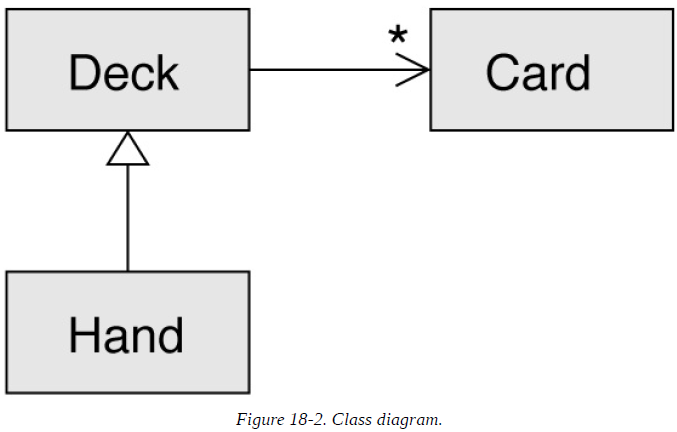

The arrow with a hollow triangle head represents an IS-A relationship; in this
case it indicates that Hand inherits from Deck.

The standard arrowhead represents a HAS-A relationship; in this case a Deck has
references to Card objects.

The star (*) near the arrowhead is a multiplicity; it indicates how many Cards a
Deck has. 

A multiplicity can be a simple number like 52, a range like 5..7 or a star, which indicates that a Deck can have any number of Cards.

There are no dependencies in this diagram. 

They would normally be shown with a dashed arrow. 

Or if there are a lot of dependencies, they are sometimes omitted.

A more detailed diagram might show that a Deck actually contains a list of
Cards, but built-in types like list and dict are usually not included in class
diagrams.

# **Data Encapsulation**
The previous Sessions demonstrate a development plan that might be called as “Object Oriented Design”. 

The objects that are needed are identified — like Point, Rectangle and Time — and defined classes to represent them. 

In each case, there is an obvious correspondence between the object and some entity in the real world (or at least a mathematical world).

But sometimes it is less obvious what objects are required and how they should
interact. 

In that case a different development plan is needed. 

In the same way, that function interfaces were discovered by encapsulation and generalization, class interfaces can be discovered by data encapsulation.

Markov analysis, from “Markov Analysis”, provides a good example. 

If the code of the Textbook downloaed from http://thinkpython2.com/code/markov.py, it can be seen that it uses two global variables — suffix_map and prefix — that are read and written from several functions.

suffix_map = {}

prefix = ()

Because these variables are global, only one analysis can be run at a time. 

If two texts are read, their prefixes and suffixes would be added to the same data structures (which makes for some interesting generated text).

To run multiple analyses, and keep them separate, the state of each analysis  can be encapsulated in an object. 

Here’s what that looks like:

class Markov:

  def __init__(self):

    self.suffix_map = {}

    self.prefix = ()

Next, the functions are transformed into methods. 

**For Example:** 

Here’s process_word:

def process_word(self, word, order=2):

  if len(self.prefix) < order:

    self.prefix += (word,)
    
    return
try:

  self.suffix_map[self.prefix].append(word)

except KeyError:

  # if there is no entry for this prefix, make one

  self.suffix_map[self.prefix] = [word]

  self.prefix = shift(self.prefix, word)

Transforming a program like this — changing the design without changing the
behavior — is another example of refactoring (see “Refactoring”).

This example suggests a development plan for designing objects and methods:

1. Start by writing functions that read and write global variables (when
   necessary).

2. Once you get the program working, look for associations between global
   variables and the functions that use them.

3. Encapsulate related variables as attributes of an object.

4. Transform the associated functions into methods of the new class.

As an exercise, download my Markov code from http://thinkpython2.com/code/markov.py, and follow the steps described above to encapsulate the global variables as attributes of a new class called Markov.

Solution: http://thinkpython2.com/code/Markov.py (note the capital M)

# **Glossary**
**Encode:**

To represent one set of values using another set of values by constructing a
mapping between them.

**Class Attribute:**

An attribute associated with a class object. Class attributes are defined
inside a class definition but outside any method.

**Instance attribute:**

An attribute associated with an instance of a class.

**Veneer:**

A method or function that provides a different interface to another function
without doing much computation.

**Inheritance:**

The ability to define a new class that is a modified version of a previously
defined class.

**Parent class:**

The class from which a child class inherits.

**Child class:**

A new class created by inheriting from an existing class; also called a
“subclass”.

**IS-A relationship:**

A relationship between a child class and its parent class.

**HAS-A relationship:**

A relationship between two classes where instances of one class contain
references to instances of the other.

**Dependency:**
A relationship between two classes where instances of one class use
instances of the other class, but do not store them as attributes.

**Class diagram:**

A diagram that shows the classes in a program and the relationships
between them.

**Multiplicity:**

A notation in a class diagram that shows, for a HAS-A relationship, how
many references there are to instances of another class.

**Data encapsulation:**

A program development plan that involves a prototype using global
variables and a final version that makes the global variables into instance
attributes.

# **Exercises**

# Exercise 1.
For the following program, draw a UML class diagram that shows these classes
and the relationships among them.

class PingPongParent:

pass

class Ping(PingPongParent):

  def __init__(self, pong):

    self.pong = pong

class Pong(PingPongParent):

  def __init__(self, pings=None):

    if pings is None:

      self.pings = []

    else:

      self.pings = pings

def add_ping(self, ping):

  self.pings.append(ping)

  pong = Pong()

  ping = Ping(pong)

  pong.add_ping(ping)

# Exercise 2.
Write a Deck method called deal_hands that takes two parameters: the number
of hands and the number of cards per hand. 

It should create the appropriate number of Hand objects, deal the appropriate number of cards per hand, and return a list of Hands.

# Exercise 18-3.
The following are the possible hands in poker, in increasing order of value and
decreasing order of probability:

**pair**:

Two cards with the same rank.

**two pair**:

Two pairs of cards with the same rank.

**three of a kind**:

Three cards with the same rank.

**straight**:

Five cards with ranks in sequence (aces can be high or low, so Ace-2-3-4-5 is a straight and so is 10-Jack-Queen-King-Ace, but Queen-King-Ace-2-3 is not.)

**flush**:

Five cards with the same suit.

**full house**:

Three cards with one rank, two cards with another.

**four of a kind**:

Four cards with the same rank.

**straight flush**:

Five cards in sequence (as defined above) and with the same suit.

The goal of these exercises is to estimate the probability of drawing these
various hands.

1. Download the following files from http://thinkpython2.com/code: Card.py:
A complete version of the Card, Deck and Hand classes.

PokerHand.py:

An incomplete implementation of a class that represents a poker hand, and
some code that tests it.

If **PokerHand.py** is run, it deals seven 7-card poker hands and checks to see
if any of them contains a flush. 

Read this code carefully before going further.

Add methods to PokerHand.py named has_pair, has_twopair, etc. that return
True or False according to whether or not the hand meets the relevant criteria.

The code should work correctly for “hands” that contain any number of cards
(although 5 and 7 are the most common sizes).

Write a method named classify that figures out the highest-value classification for a hand and sets the label attribute accordingly. 

# Example:

A 7-card hand might contain a flush and a pair; it should be labeled “flush”.

When convinced that the classification methods are working fine, the next
step is to estimate the probabilities of the various hands. 

Write a function in PokerHand.py that shuffles a deck of cards, divides it into hands, classifies the hands, and counts the number of times various classifications appear.

Print a table of the classifications and their probabilities. 

Run your program with larger and larger numbers of hands until the output values converge to a reasonable degree of accuracy. Compare your results to the values at http://en.wikipedia.org/wiki/Hand_rankings.

Solution: http://thinkpython2.com/code/PokerHandSoln.py.


# **END OF MODULE 4**